In [1]:
#Install packages
%pip install wandb -qU
%pip install --no-deps scikeras
%pip install tensorflow-addons

     |████████████████████████████████| 1.9 MB 8.0 MB/s 
     |████████████████████████████████| 182 kB 52.4 MB/s 
     |████████████████████████████████| 173 kB 50.1 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 168 kB 47.6 MB/s 
     |████████████████████████████████| 168 kB 43.5 MB/s 
     |████████████████████████████████| 166 kB 45.1 MB/s 
     |████████████████████████████████| 166 kB 50.5 MB/s 
     |████████████████████████████████| 162 kB 47.3 MB/s 
     |████████████████████████████████| 162 kB 45.6 MB/s 
     |████████████████████████████████| 158 kB 42.5 MB/s 
     |████████████████████████████████| 157 kB 43.2 MB/s 
     |████████████████████████████████| 157 kB 29.3 MB/s 
     |████████████████████████████████| 157 kB 43.1 MB/s 
     |████████████████████████████████| 157 kB 48.1 MB/s 
     |████████████████████████████████| 157 kB 50.0 MB/s 
     |████████████████████████████████| 157 kB 53.8 MB/s 
     |███████████

In [2]:
#imports
import wandb
from wandb.keras import WandbCallback
import numpy as np
import pandas as pd
from re import X
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
from sklearn.metrics import roc_auc_score
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout

In [3]:
#connect drive containing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Obtain Dataset

In [4]:
#Use pandas read_csv() function to import data
df = pd.read_csv('/content/drive/MyDrive/CSC461/Final Data /SouthKingstown.csv')
df.head()

,CITY,ZIP CODE,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8,TGT STATEWIDE PRIMARY,TGT PARTY AFFILIATION
0,31,2879,2,1941,1,1,1,1,1,1,2,2,2,1,2
1,31,2879,2,1940,1,1,1,1,1,1,2,2,2,1,2
2,31,2879,3,1990,0,1,0,0,0,0,0,0,0,0,0
3,31,2879,3,1981,0,1,0,0,1,0,0,0,0,0,0
4,31,2879,2,1984,0,1,0,0,0,0,0,0,0,0,0


Define features and label

In [5]:
#Drop unnecessary features
df = df.drop(["CITY",'ZIP CODE'], axis=1)
df.head()

,CURRENT PARTY,YEAR OF BIRTH,ELECTION 3,ELECTION 4,ELECTION 5,ELECTION 6,ELECTION 7,ELECTION 8,PARTY 5,PARTY 6,PARTY 8,TGT STATEWIDE PRIMARY,TGT PARTY AFFILIATION
0,2,1941,1,1,1,1,1,1,2,2,2,1,2
1,2,1940,1,1,1,1,1,1,2,2,2,1,2
2,3,1990,0,1,0,0,0,0,0,0,0,0,0
3,3,1981,0,1,0,0,1,0,0,0,0,0,0
4,2,1984,0,1,0,0,0,0,0,0,0,0,0


In [6]:
#Setting our prediction target and dropping target columns from the main dataset
predict = 'TGT STATEWIDE PRIMARY'
drops = ['TGT STATEWIDE PRIMARY','TGT PARTY AFFILIATION']
X = df.drop(drops, axis=1)
y = df[predict]
print(X.head())
print(y.head())

   CURRENT PARTY  YEAR OF BIRTH  ELECTION 3  ELECTION 4  ELECTION 5  \
0              2           1941           1           1           1   
1              2           1940           1           1           1   
2              3           1990           0           1           0   
3              3           1981           0           1           0   
4              2           1984           0           1           0   

   ELECTION 6  ELECTION 7  ELECTION 8  PARTY 5  PARTY 6  PARTY 8  
0           1           1           1        2        2        2  
1           1           1           1        2        2        2  
2           0           0           0        0        0        0  
3           0           1           0        0        0        0  
4           0           0           0        0        0        0  
0    1
1    1
2    0
3    0
4    0
Name: TGT STATEWIDE PRIMARY, dtype: int64


In [7]:
#creates labels for classes
le = LabelEncoder()
le.fit_transform(y)

array([1, 1, 0, ..., 1, 0, 0])

In [8]:
#train_test_split the dataset
X_train, X_test, y_train, y_test =  sklearn.model_selection.train_test_split(X, y, test_size=0.3, shuffle=True)

print(f'Train y: {y_train.shape}')
print(f'Train X: {X_train.shape}')
print(f'Test y: {y_test.shape}')
print(f'Test X: {X_test.shape}')

Train y: (16289,)
Train X: (16289, 11)
Test y: (6982,)
Test X: (6982, 11)


In [9]:
#Scaling the data using MinMaxScaler() in an attempt to normalize data
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Perform undersampling in an attempt to fix the unbalanced dataset
##################################################################################
undersample = RandomUnderSampler(sampling_strategy='majority')

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print(f'Train y: {y_train_under.shape}')
print(f'Train X: {X_train_under.shape}')
###################################################################################
undersample = RandomUnderSampler(sampling_strategy='majority')

X_test_under, y_test_under = undersample.fit_resample(X_test, y_test)

print(f'Test y: {y_test_under.shape}')
print(f'Test X: {X_test_under.shape}')


Train y: (6740,)
Train X: (6740, 11)
Test y: (2848,)
Test X: (2848, 11)


--------------------
**W&B SWEEP START**

If training a model on sweep results, skip to end of this section below.

In [ ]:
# W&B sweep configuration
sweep_configuration = {
    'method': 'random',
    'name': 'sweep',
    'metric': {
        'goal': 'maximize', 
        'name': 'val_auc'
		},
    'parameters': {
        'batch_size': {'values': [16,32,64,128]},
        'epochs': {'values': [50,100,150,200]},
        'fc_layer_size': {'values': [7,9,11,13,15]},
        'sc_layer_size': {'values': [7,9,11,13,15]},
        'lr': {'max': 0.1, 'min': 0.0001},
        'optimizer':{'values': ['adam','SGD','RMSprop',
                                'nadam','Adadelta','Adagrad',
                                'Adamax','Ftrl']},
        'dropout': {'values': [0, 0.3, 0.5]},
     },

}

sweep_id = wandb.sweep(sweep=sweep_configuration, project="ann-propensity-sk", entity="gotv-ml")

from tensorflow.keras.optimizers import SGD
def get_optimizer(lr=1e-3, optimizer="adam"):
    "Select optmizer between adam and sgd with momentum"
    if optimizer.lower() == "adam":
        return tf.keras.optimizers.Adam(learning_rate=lr)
    if optimizer.lower() == "sgd":
        return tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.1)
    if optimizer.lower() == "rmsprop":
        return tf.keras.optimizers.RMSprop(learning_rate=lr)
    if optimizer.lower() == "nadam":
        return tf.keras.optimizers.Nadam(learning_rate=lr)
    if optimizer.lower() == "adadelta":
        return tf.keras.optimizers.Adadelta(learning_rate=lr)
    if optimizer.lower() == "adagrad":
        return tf.keras.optimizers.Adagrad(learning_rate=lr)
    if optimizer.lower() == "adamax":
        return tf.keras.optimizers.Adamax(learning_rate=lr)
    if optimizer.lower() == "ftrl":
        return tf.keras.optimizers.Ftrl(learning_rate=lr)

Define Keras Model

In [ ]:
def Neural_Net(fc_layer_size=11,sc_layer_size=7,dropout=0):

  # initiate Network
  network = Sequential()

  # input layer that is fully connected with ReLU activation 
  network.add(Dense(11, input_dim=11, activation="relu",use_bias=True,bias_initializer="random_normal", kernel_initializer="he_normal"))
  network.add(Dropout(dropout))
  #hiddent layers 
  network.add(Dense(fc_layer_size, activation="relu", use_bias=True, bias_initializer="random_normal", kernel_initializer="he_normal"))
  network.add(Dropout(dropout))
  network.add(Dense(sc_layer_size, activation="relu", use_bias=True, bias_initializer="random_normal", kernel_initializer="he_normal"))

  #Output layer that is fully connected with sigmoid activation
  network.add(Dense(1, activation="sigmoid",kernel_initializer="glorot_normal"))


  #return completed network
  return network 

In [ ]:
def train(model, batch_size=64, epochs=10, lr=1e-3, optimizer='adam', log_freq=10):  
    
    # Compile model like you usually do.
    tf.keras.backend.clear_session()
    model.compile(optimizer=get_optimizer(lr, optimizer) ,
               loss="binary_crossentropy",
               metrics=["accuracy",
               tfa.metrics.F1Score(num_classes=2,
                                  average='micro',
                                  threshold=0.5),
               tf.keras.metrics.AUC(from_logits=False)
                        ]) 

    model.fit(X_train_under, 
              y_train_under, 
              batch_size=batch_size, 
              epochs=epochs, 
              validation_data=(X_test, y_test), 
              callbacks=[WandbCallback()])
    
def sweep_train(config_defaults=None):
    # Initialize wandb with a sample project name
    with wandb.init(config=config_defaults):  # this gets over-written in the Sweep

        # Specify the other hyperparameters to the configuration, if any
        wandb.config.architecture_name = "NN_Binary"
        wandb.config.dataset_name = "Southkingstown_csv"

        # initialize model
        model = Neural_Net(wandb.config.fc_layer_size,wandb.config.sc_layer_size,wandb.config.dropout)

        train(model, 
              wandb.config.batch_size, 
              wandb.config.epochs,
              wandb.config.lr,
              wandb.config.optimizer)

import pprint
pprint.pprint(sweep_configuration)

In [ ]:
#Call the sweep agent to train the model under randomized parameters
wandb.agent(sweep_id, function=sweep_train, count=10)

----------
**W&B SWEEP END**

------------------------
Take the best parameters from sweep and run through new keras model for confusion matrix.


In [11]:
#set Hyper-parameters for W&B 
run = wandb.init(entity="gotv-ml", project="ann-propensity-sk")
config = run.config
config.opti = 'adamax'
config.batch_size = 128
config.epochs = 100
config.learn_rate = 0.07087
config.fc_layer_size = 15
config.sc_layer_size = 15
config.dropout = 0


#Build the model
def Neural_Net(fc_layer_size=15,sc_layer_size=15,dropout=0):

  # initiate Network
  network = Sequential()

  # input layer that is fully connected with ReLU activation 
  network.add(Dense(11, input_dim=11, activation="relu",use_bias=True,bias_initializer="random_normal", kernel_initializer="he_normal"))
  network.add(Dropout(dropout))
  #hidden layers 
  network.add(Dense(fc_layer_size, activation="relu", use_bias=True, bias_initializer="random_normal", kernel_initializer="he_normal"))
  network.add(Dropout(dropout))
  network.add(Dense(sc_layer_size, activation="relu", use_bias=True, bias_initializer="random_normal", kernel_initializer="he_normal"))

  #Output layer that is fully connected with sigmoid activation
  network.add(Dense(1, activation="sigmoid"))


  # Compile network model.
  network.compile(optimizer=config.opti,
               loss="binary_crossentropy",
               metrics=["accuracy",
               tfa.metrics.F1Score(num_classes=2,
                                  average='micro',
                                  threshold=0.5),
               tf.keras.metrics.AUC(from_logits=False)
                        ]) 
  

  #return completed network
  return network 

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [12]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(
                                 model=Neural_Net, 
                                 epochs=config.epochs, 
                                 batch_size=config.batch_size, 
                                 verbose=0,
                                 callbacks=[WandbCallback()]
                                 )

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Conduct k-Fold Cross-Validation Using scikit-learn and Evaluate the Model with Random Under Sampler Training Data

In [13]:
#Setup stratified Kfold for cross validation
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
#ROC performance metric cross_val
scores_roc = cross_val_score(neural_network, X_train_under, y_train_under,
                         scoring="roc_auc", cv=kfold)

In [ ]:
scores_roc

array([0.93007323, 0.91173192, 0.92679372, 0.91906244, 0.90802023,
       0.93185903, 0.91438842, 0.90033625, 0.90277431, 0.90711724])

In [ ]:
#F1 performance metric cross_val (F1=measure of a test's accuracy)
scores_f1 = cross_val_score(neural_network,  X_train_under, y_train_under,
                         scoring="f1", cv=kfold)

In [ ]:
scores_f1 

array([0.85217391, 0.85082873, 0.84927536, 0.83286119, 0.83309558,
       0.87267525, 0.8425656 , 0.83806818, 0.82845188, 0.84539007])

In [ ]:
#shows how good the model is 
predictions = cross_val_predict(neural_network, X_train_under, y_train_under, cv=kfold)

[[2733  678]
 [ 426 2985]] 



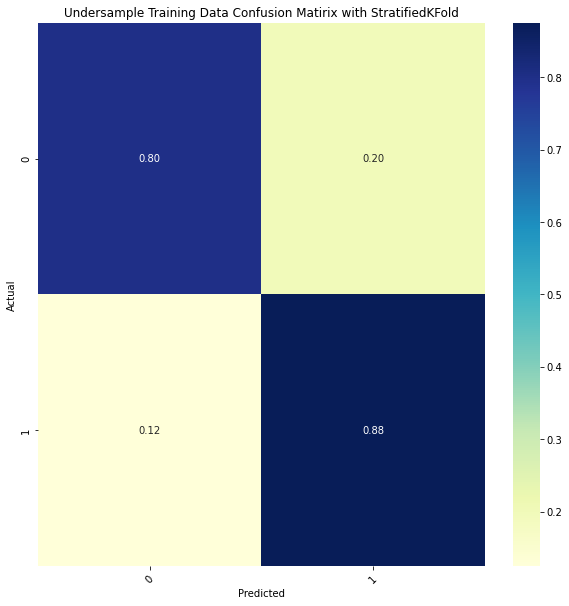


F1 Score: 0.8381706244503079
Precision: 0.8381706244503079
Recall: 0.8381706244503079
Accuracy: 0.8381706244503079


In [ ]:
conf_matrix = confusion_matrix(y_train_under, predictions)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Undersample Training Data Confusion Matirix with StratifiedKFold')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_train_under, predictions, average='macro')))
print('Precision: {}'.format(
    precision_score(y_train_under, predictions, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_train_under, predictions, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_train_under, predictions, )))

Training Data no Cross

In [ ]:
model = neural_network
#Fit the model
model.fit(X_train_under, y_train_under, validation_data=(X_test, y_test), epochs=config.epochs, batch_size=config.batch_size, callbacks=[WandbCallback()])
test_pred = model.predict(X_test)
test_proba = model.predict_proba(X_test)
test_accuracy = roc_auc_score(y_test, test_proba[:,1])

print("Test AUC: {}".format(test_accuracy))

-----------
Train predictions & confusion matrix

In [ ]:
predictions_train = (model.predict(X_train) > 0.5).astype("int32")

510/510 [==============================] - 1s 892us/step


[[10451  2427]
 [  407  3004]] 



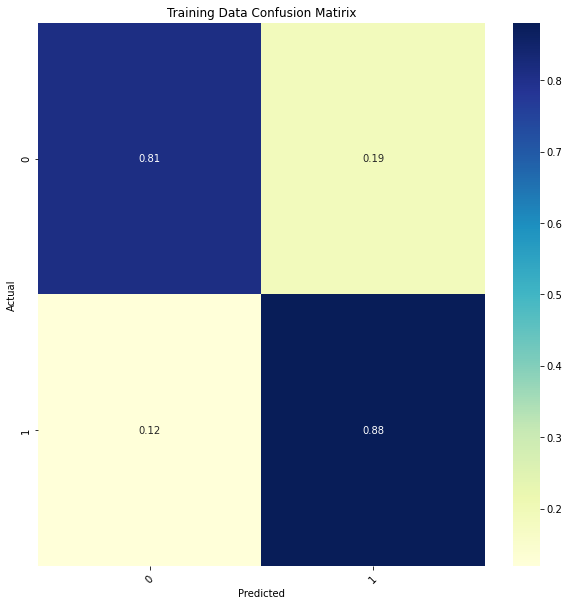


F1 Score: 0.8260175578611333
Precision: 0.8260175578611333
Recall: 0.8260175578611333
Accuracy: 0.8260175578611333


In [ ]:
conf_matrix = confusion_matrix(y_train, predictions_train)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Training Data Confusion Matirix')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_train, predictions_train, average='macro')))
print('Precision: {}'.format(
    precision_score(y_train, predictions_train, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_train, predictions_train, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_train, predictions_train, )))

-----------
Undersanpled train predictions & confusion matrix

In [ ]:
predictions_train_under = (model.predict(X_train_under) > 0.5).astype("int32")

214/214 [==============================] - 0s 842us/step


[[2731  680]
 [ 407 3004]] 



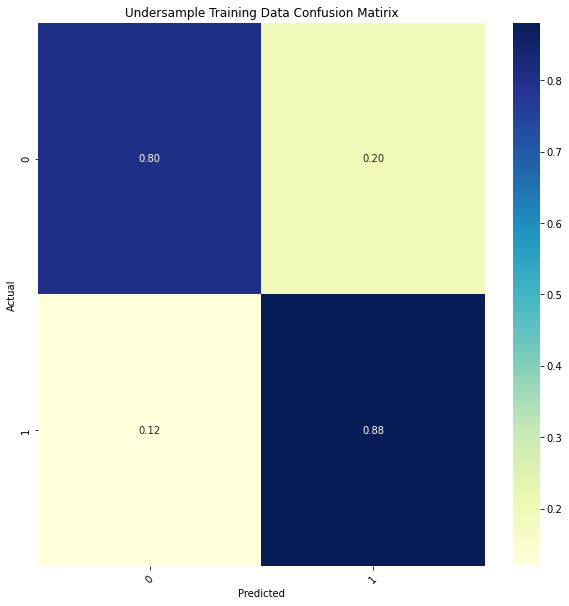


F1 Score: 0.8406625622984462
Precision: 0.8406625622984462
Recall: 0.8406625622984462
Accuracy: 0.8406625622984462


In [ ]:
conf_matrix = confusion_matrix(y_train_under, predictions_train_under)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Undersample Training Data Confusion Matirix')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_train_under, predictions_train_under, average='macro')))
print('Precision: {}'.format(
    precision_score(y_train_under, predictions_train_under, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_train_under, predictions_train_under, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_train_under, predictions_train_under, )))

-----------
Test predictions & confusion matrix


In [ ]:
predictions_test = (model.predict(X_test) > 0.5).astype("int32")

219/219 [==============================] - 0s 905us/step


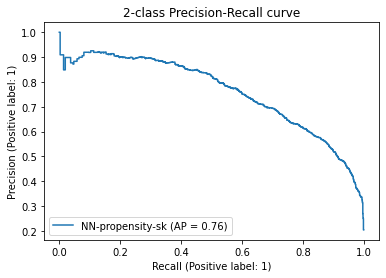

In [16]:
#PR-curve
neural_network.fit(X_train, y_train)

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    neural_network, X_test, y_test, name="NN-propensity-sk"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

[[4562 1037]
 [ 192 1191]] 



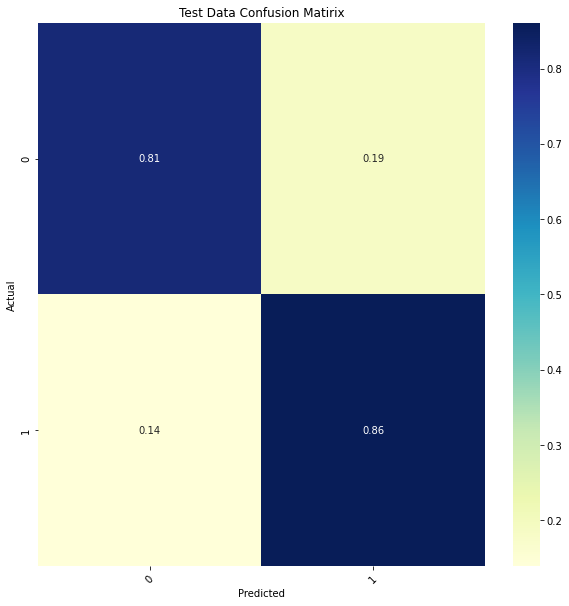


F1 Score: 0.8239759381266113
Precision: 0.8239759381266113
Recall: 0.8239759381266113
Accuracy: 0.8239759381266113


In [ ]:
conf_matrix = confusion_matrix(y_test, predictions_test)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Test Data Confusion Matirix')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_test, predictions_test, average='macro')))
print('Precision: {}'.format(
    precision_score(y_test, predictions_test, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_test, predictions_test, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_test, predictions_test, )))

-----------
Undersanpled test predictions & confusion matrix

In [ ]:
predictions_test_under = (model.predict(X_test_under) > 0.5).astype("int32")

87/87 [==============================] - 0s 901us/step


[[1143  240]
 [ 192 1191]] 



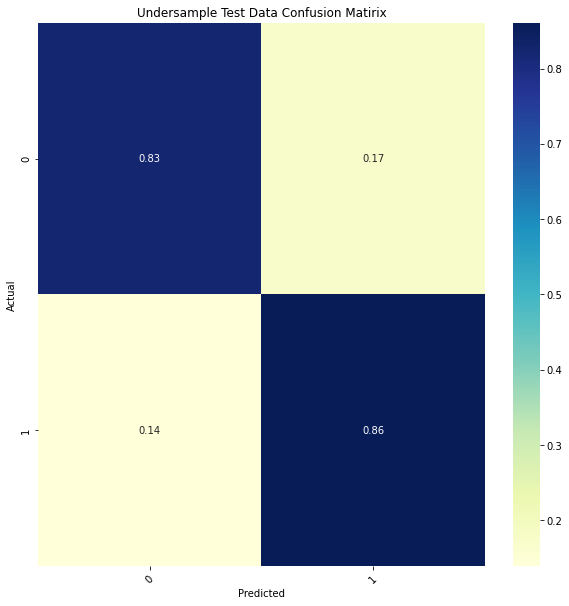


F1 Score: 0.8438177874186552
Precision: 0.8438177874186551
Recall: 0.8438177874186551
Accuracy: 0.8438177874186551


In [ ]:
conf_matrix = confusion_matrix(y_test_under, predictions_test_under)
print(conf_matrix, '\n')

conf_matrix_n = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_matrix_n, annot=True, fmt='.2f', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Undersample Test Data Confusion Matirix')
plt.xticks(rotation=45)
plt.show(block=False)

print('\nF1 Score: {}'.format(
    f1_score(y_test_under, predictions_test_under, average='macro')))
print('Precision: {}'.format(
    precision_score(y_test_under, predictions_test_under, average='weighted'))) #weighted to show AUC-Precision/Recall curve
print('Recall: {}'.format(
    recall_score(y_test_under, predictions_test_under, average='macro')))
print('Accuracy: {}'.format(
    accuracy_score(y_test_under, predictions_test_under, )))